  ### FAKE NEWS DETECTION USING POLITIFACT AND SNOPES DATA
   Alaa Abo Jouhain
   B M Nafis Fuad
   Md Safin Sarker

## Fake News Detection
The main objective of the project is to investigate different machine learning techniques for identifying and examining fake news in comparison to real news. The project involves evaluating multiple classification methods in order to determine the most effective model for detecting fake news.

### Steps for detecting fake news:
1. Data Collection: 
   Import the necessary libraries
   There are two JSON files that make up the dataset for this project. The first file contains data sourced from the Politifact website, while the second file contains data sourced from the Snopes website. Both datasets consist of multiclassification labels.

2. Exploring and Data visualization:
    - Printing column name of each data sets and choosing most common columns like label,claim and doc.
    - Merging two datasets into one data and finding the unique label using thresold function.
    - Dataset of label field contains different attibutes like 'false', 'barely-true', 'half-true', 'mostly-true', 'pants-fire', 'true'.
    - Figureout the news is fake or real. So by replacing 'barely-true','pants-fire' and 'half-true' as 'false' as well as 'mostly-true' as 'true' for binary classification
    - Both 'claim' and 'doc' column contains text, so merging those columns as 'text' field for better way
    - Representing the binary values for label field '0 for false' and '1 for true'

3. Preprocessing & Cleaning dataset: 
       In order to facilitate pattern detection by a machine learning algorithm, the dataset needs to be preprocessed. The nltk library can be used to remove certain functionalities from the text and extract relevant information. Some common preprocessing steps include:

     Tokenization: Breaking the text into individual words or tokens.
     Stopword removal: Removing common words that do not contribute to the meaning of the text, such as "the", "and", and "a".
     Stemming or Lemmatization: Reducing words to their base form, such as converting "running" to "run".
     Removing punctuation and special characters: Getting rid of symbols that do not add meaning to the text.
     Lowercasing: Converting all text to lowercase to ensure consistency.
     By applying these preprocessing steps,

4. Splitting the data into training and Testing parts. 
 
5. Feature extraction & Classification Models.
    - To make the text dataset suitable for training in a machine learning model, it needs to be converted into numerical form through a process called vectorization. There are various techniques for feature extraction, including TF-IDF, bag of words, and pre-trained word embedding methods such as GloVe.
    - Apply simple Machine learning Model and check the accuracy.
    - Apply Deep Neural Network Classifier (LSTM, Bert) and make display all visualization using tensorboard.

    
6. Evaluating the models and Comparing between classifier models.

### Resources:
1. https://medium.com/swlh/fake-news-detection-using-machine-learning-69ff9050351f
2. https://researchtrend.net/ijet/pdf/A%20Comparison%20of%20Machine%20Learning%20Algorithms%20in%20Fake%20News%20Detection%20LOKESHKUMAR%20R.pdf
3. http://colah.github.io/posts/2015-08-Understanding-LSTMs/
4. https://www.tensorflow.org/text/guide/word_embeddings
5. https://www.tensorflow.org/guide/keras/train_and_evaluate
6. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
7. https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
8. https://stavanger.instructure.com/courses/10010/files/1096892?module_item_id=179592
9. https://medium.com/analytics-vidhya/fake-news-detector-cbc47b085d4
10. https://www.analyticsvidhya.com/blog/2021/07/detecting-fake-news-with-natural-language-processing/
11. https://www.machinelearningplus.com/nlp/gensim-tutorial/
12. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/ 
13. https://towardsdatascience.com/fake-news-classification-with-bert-afbeee601f41
14. https://www.analyticsvidhya.com/blog/2022/03/fake-news-classification-using-deep-learning/#h2_8 

### 1. Data Collection: 
- Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import regex as re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer

- Import the Dataset from two json files

In [2]:
politifact_data = pd.read_json('C:/Users/alaaa/Downloads/fact_checks/fact_checks/politifact.json')
snopes_data = pd.read_json('C:/Users/alaaa/Downloads/fact_checks/fact_checks/snopes.json')

### 2. Exploring and Data visualization

In [3]:
politifact_data.head(2)

,claim,doc,label,factchecker,published,speaker,date_stated,stated_in,url,topic,sources,summary
0,There were no American flags at the first Demo...,"In the race to the White House, who is the mos...",false,Ciara O'Rourke,2019-6-28,Viral image,2019-6-27,a post,https://www.politifact.com/factchecks/2019/jun...,"[Debates, Patriotism, Facebook fact-checks, Vi...","[{'description': 'Facebookpost, June 27, 2019'...",None
1,"Quotes Thomas Jefferson as saying that ""a gove...",A post that recently popped up on social media...,false,Samantha Putterman,2019-6-6,Facebook posts,2019-6-4,a Facebook post,https://www.politifact.com/factchecks/2019/jun...,"[Fake news, Government Regulation, Facebook fa...","[{'description': 'Facebookpost, June 4, 2019',...",None


In [4]:
print(politifact_data.columns)

Index(['claim', 'doc', 'label', 'factchecker', 'published', 'speaker',
       'date_stated', 'stated_in', 'url', 'topic', 'sources', 'summary'],
      dtype='object')


In [5]:
snopes_data.head(2)

,label,claim,doc,factchecker,published,url,topic,sources,extra_description
0,False,Storing a car battery on a concrete floor will...,Much of what makes a car go remains an arcane ...,Snopes Staff,2011-1-4,https://www.snopes.com/fact-check/battery-park/,"[Automobiles, Techno File]","[{'description': 'Magliozzi, Tom and Ray. “Cli...",None
1,True,U.S. President Donald Trump tapped World Wrest...,"In mid-April 2020, controversy consumed the Tr...",Bethania Palma,2020-4-16,https://www.snopes.com/fact-check/coronavirus-...,"[Politics, COVID-19]","[{'description': 'McGeorge, Alistair.“Donald T...",None


- Feature selection

In [6]:
# find the common columns between the dataframes
common_cols = np.intersect1d(politifact_data.columns, snopes_data.columns)
print(common_cols)

['claim' 'doc' 'factchecker' 'label' 'published' 'sources' 'topic' 'url']


In [7]:
# Taking only the necessary features from both datasets
snopes_data_filtered = snopes_data[['claim', 'doc', 'label']].copy()
politifact_data_filtered = politifact_data[['claim', 'doc', 'label']].copy()

In [8]:
#Finding the unique values of label from Snoper Filtered Data
Snopes_Label = snopes_data_filtered.label.unique()
Snopes_Label

array(['False', 'True', 'Outdated', 'Mostly False', 'Correct Attribution',
       'Unproven', 'Mixture', 'Scam', 'Miscaptioned', 'Legend',
       'Misattributed', 'Labeled Satire', 'Lost Legend', 'Mostly True',
       'Research In Progress'], dtype=object)

In [9]:
#Finding the unique values of label from Politifact Filtered Data
Politifact_Label = politifact_data_filtered.label.unique()
Politifact_Label

array(['false', 'barely-true', 'half-true', 'mostly-true', 'pants-fire',
       'true', 'full-flop', 'half-flip', 'no-flip'], dtype=object)

- Checking NULL values

In [10]:
print('Count of null values in snopes data ', snopes_data_filtered.isnull().sum())
print('-'*100)
print('Count of null values politifact data ',politifact_data_filtered.isnull().sum())

Count of null values in snopes data  claim    0
doc      0
label    0
dtype: int64
----------------------------------------------------------------------------------------------------
Count of null values politifact data  claim    0
doc      0
label    0
dtype: int64


- Visualizing label data from both Snopes and Politifact filtered Data

<AxesSubplot:xlabel='count', ylabel='label'>

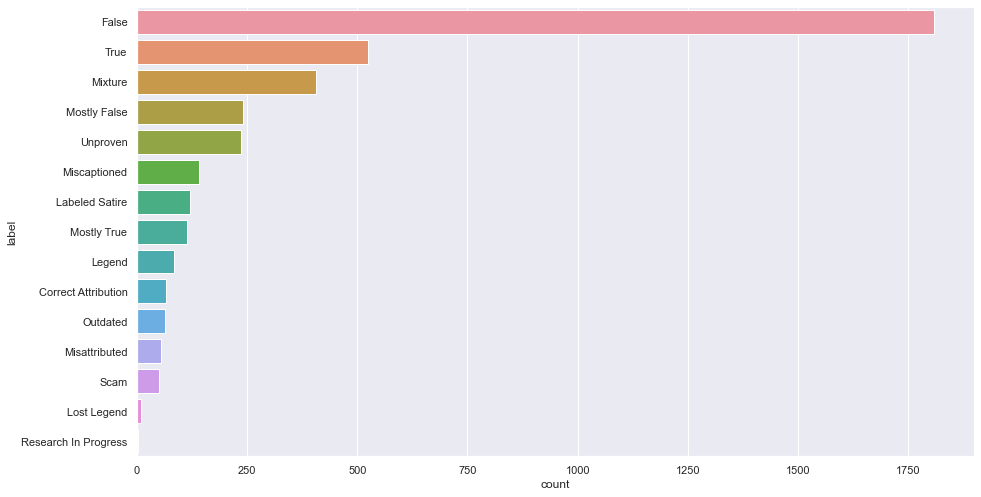

In [11]:
sns.set(rc={'figure.figsize':(15,8.27)})
order = snopes_data_filtered['label'].value_counts().sort_values(ascending=False).index
sns.countplot(y ='label', data = snopes_data_filtered, order=order)

<AxesSubplot:xlabel='count', ylabel='label'>

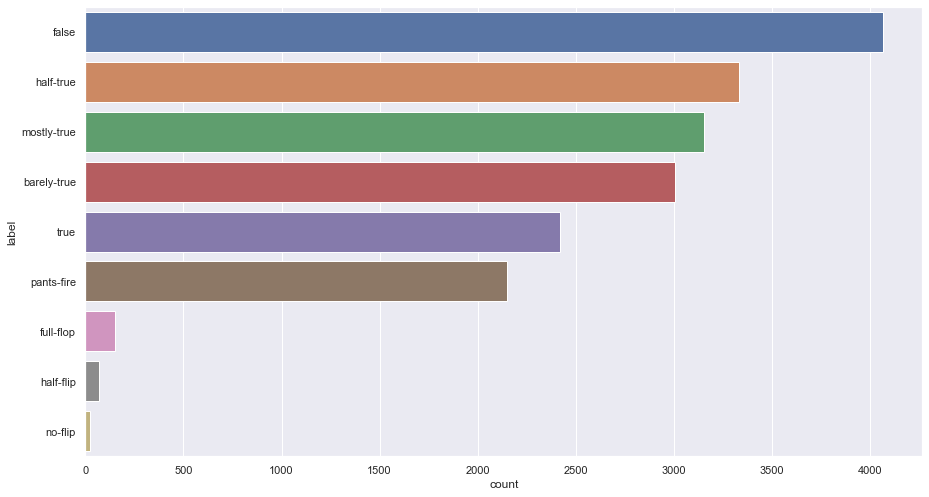

In [12]:
sns.set(rc={'figure.figsize':(15,8.27)})
order2 = politifact_data_filtered['label'].value_counts().sort_values(ascending=False).index
sns.countplot(y ='label', data = politifact_data_filtered, order=order2)

- Remove Unwanted Rows from Both Dataset

In [13]:
delValues = ['Lost Legend','Research In Progress', 'Miscaptioned','Misattributed','Legend', 'full-flop', 'half-flip', 'no-flip', 'Outdated', 'Unproven', 'Mixture', 'Scam', 'Labeled Satire']

snopes_data_filtered = snopes_data_filtered[snopes_data_filtered.label.isin(delValues) == False]
print('Snopes Label:',snopes_data_filtered.label.unique())

politifact_data_filtered = politifact_data_filtered[politifact_data_filtered.label.isin(delValues) == False]
print('Politifact Label:', politifact_data_filtered.label.unique())

Snopes Label: ['False' 'True' 'Mostly False' 'Correct Attribution' 'Mostly True']
Politifact Label: ['false' 'barely-true' 'half-true' 'mostly-true' 'pants-fire' 'true']


- Convert from multi labels to binary label(true, false) for each dataset

In [14]:
def Binary_Convertion(data, Datalabels):  
    FalseLabel = ['False', 'false',  'Mostly False',  'pants-fire']
    TrueLabel = ['True', 'true', 'Correct Attribution', 'Mostly True', 'mostly-true', 'half-true', 'barely-true' ]
    for label in Datalabels:
        if label in FalseLabel:
            data.replace(label, 'false', inplace=True)
        if label in TrueLabel:
            data.replace(label, 'true', inplace=True)

In [15]:
# Converting both data sets to binary
Snopes_Binary = snopes_data_filtered.copy()
Binary_Convertion(Snopes_Binary, Snopes_Label)

Politifact_Binary = politifact_data_filtered.copy()
Binary_Convertion(Politifact_Binary, Politifact_Label)

In [16]:
# Check values for each lables and shows the graph
def LabelCount(data, title):
    print(title)
    print(data.label.value_counts())
    counts = data['label'].value_counts()
    fig1, ax1 = plt.subplots()
    ax1.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    ax1.set_title(title)
    plt.show()

Snopes Data
false    2050
true      703
Name: label, dtype: int64


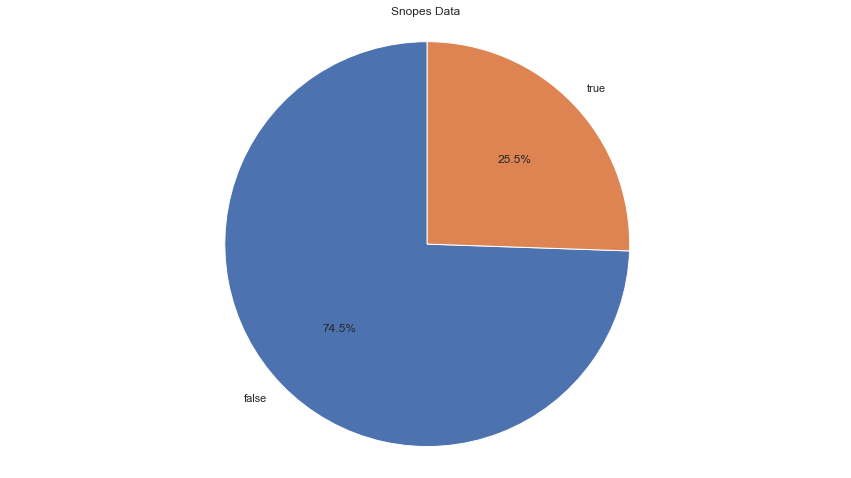

In [17]:
LabelCount(Snopes_Binary, 'Snopes Data')

Politifact Data
true     11917
false     6217
Name: label, dtype: int64


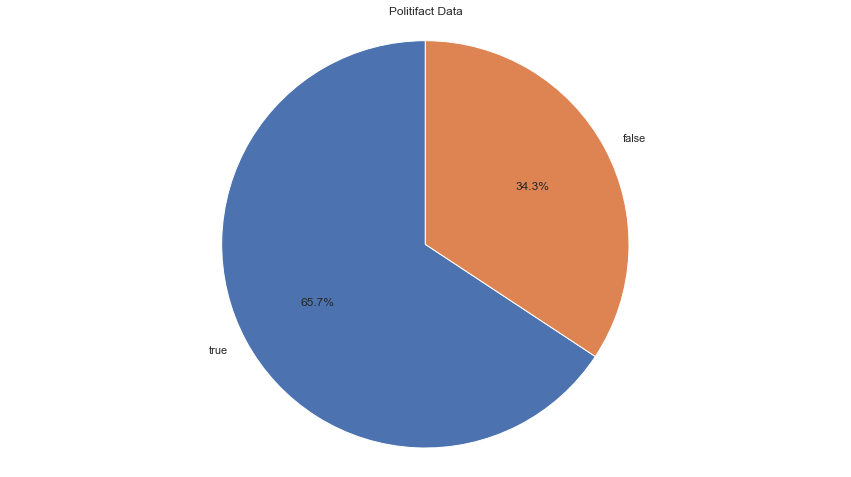

In [18]:
LabelCount(Politifact_Binary, 'Politifact Data')

- Merge Snopes and Politfact Datasets

In [19]:
## Merging two dataframes
Merged_DF = Politifact_Binary.merge(Snopes_Binary, how="outer")
Merged_DF

,claim,doc,label
0,There were no American flags at the first Demo...,"In the race to the White House, who is the mos...",false
1,"Quotes Thomas Jefferson as saying that ""a gove...",A post that recently popped up on social media...,false
2,Leaving @[4:0] as a Facebook comment can revea...,Privacy concerns abound on social media these ...,false
3,"""Disease-ridden"" migrants from parts of Africa...",Are Ebola-infected Congolese migrants streamin...,false
4,Says Islamic studies professor Tariq Ramadan s...,"Tariq Ramadan, a professor of Islamic studies ...",false
...,...,...,...
20882,Giant pythons were discovered in a small creek...,A Facebook appearing to link to a genuine news...,false
20883,Posting a legal notice on your Facebook wall o...,Messages about protecting your copyright or p...,false
20884,White House Press Secretary Sean Spicer said P...,A few days after President Trump inadvertently...,false
20885,One of the winners who shared the $1.5 billion...,One of the multitude of news stories (exaggera...,false


- Feature Preprocessing on Merged Dataframe

In [20]:
def FeaturePreprocssing(data):
    data['label'].unique()
    label_name = {'true' : 1 , 'false' : 0 }
    data['label'] = data['label'].map(label_name)

    # Concatenate claim + doc add delimiter in between
    data['text'] = data['claim'] + " // " + data['doc']

    # delete the claim and doc feature from the dataset
    del data['claim']
    del data['doc']

In [21]:
FeaturePreprocssing(Merged_DF)
Merged_DF.head()

,label,text
0,0,There were no American flags at the first Demo...
1,0,"Quotes Thomas Jefferson as saying that ""a gove..."
2,0,Leaving @[4:0] as a Facebook comment can revea...
3,0,"""Disease-ridden"" migrants from parts of Africa..."
4,0,Says Islamic studies professor Tariq Ramadan s...


Merged DataFrame
1    12620
0     8267
Name: label, dtype: int64


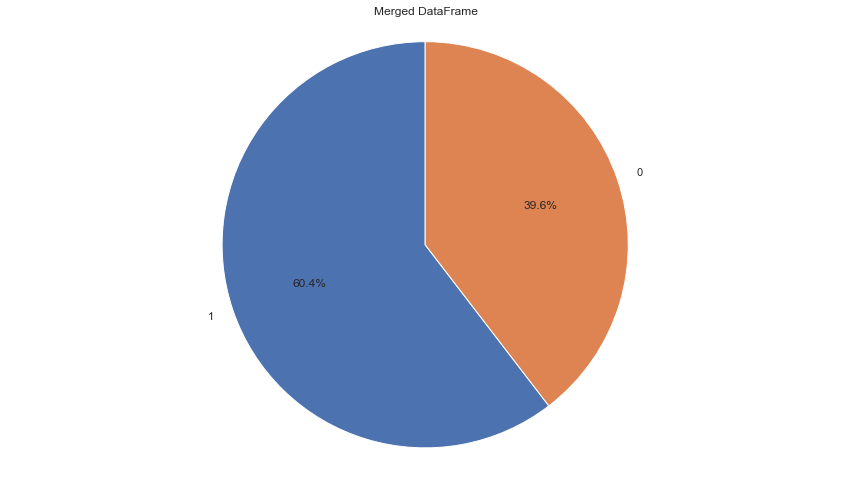

In [22]:
LabelCount(Merged_DF, 'Merged DataFrame')

### 3. Data Cleaning & Preprocessing

In [23]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alaaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\alaaa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alaaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- Remove punctuation, non alphabetic words and stopwords 
- Convert to lowercase
- Make lemmitization to simplify the dataset

In [24]:
def Preprocess_text(text):
  
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    #Remove Non Alphabetic words
    r_number=re.sub('[^a-z]', ' ', text)
    tripedspaces = re.sub('\s+', ' ', r_number)
    
    # Convert to lowercase
    text = tripedspaces.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Return preprocessed text as a string
    return " ".join(words)


In [25]:
# Applies the preprocess_text function to a specified column of a pandas DataFrame
def DF_preprocessing(df, colname):
    df_processed = df.copy()
    df_processed[colname] = df_processed[colname].apply(Preprocess_text)
    return df_processed

- Applying DF_preprocessing on Merged Dataset

In [26]:
Merged_DF_Processed = DF_preprocessing(Merged_DF, 'text')
Merged_DF_Processed

,label,text
0,0,merican flag first emocratic presidential deba...
1,0,uotes homas efferson saying government big eno...
2,0,eaving acebook comment reveal account hacked r...
3,0,iseaseridden migrant part frica bola dumped nt...
4,0,ays slamic study professor ariq amadan said us...
...,...,...
20882,0,iant python discovered small creek ndiana aceb...
20883,0,osting legal notice acebook wall nstagram feed...
20884,0,hite ouse res ecretary ean picer said resident...
20885,0,ne winner shared billion owerball jackpot succ...


### 6. splitting data and Vectorization
  Training data 80% and test data 20%.
  Here We use TFidVictorization to convert text to numerical.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def spiltingdata_and_Vectorizar(data):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], train_size=0.8, random_state=42)

    # Create a TfidfVectorizer instance with a maximum of 3000 features
    tv = TfidfVectorizer(max_features=3000, lowercase=False)

    # Fit and transform the training dataset
    tv_train = tv.fit_transform(X_train).toarray()

    # Transform the test dataset
    tv_test = tv.transform(X_test).toarray()

    # Return the transformed training dataset, transformed test dataset, training labels, and testing labels
    return tv_train, tv_test, y_train, y_test

### 7.Machine Learning Classification

Here we apply Logistic Regression,Decission tree classifier,Random forest classifier

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection,svm
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report


In [63]:
def ML_Classifiers(X_train, X_test, y_train, y_test, model, print_result=True, confusion_matrix=True):

    
    # Define the models to use
    models = {
        'LR': LogisticRegression(random_state=0),
        'RF': RandomForestClassifier(),
        'DT': DecisionTreeClassifier(),
        'SVM':svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',  probability=True),
    }
    
    # Fit the selected model to the data
    selected_model = models[model]
    selected_model.fit(X_train, y_train)
    y_pred = selected_model.predict(X_test)
    y_prob = selected_model.predict_proba(X_test)[:, 1]
  
    # Print the results (if applicable)
    if print_result:
        print(f"Machine Learning Model: {selected_model.__class__.__name__}")
        print("*"*200)
    
    return y_pred, y_prob


In [64]:
def perforMance_score(y_predict, y_test, ModelName, dataname= 'Mergeddata', ShowReport=True, ConfusionMatrix=True):
    
    
    Accuracy_Score = accuracy_score(y_test, y_predict)
    Recall_Score = recall_score(y_test, y_predict)
    
    # Show performance report
    if ShowReport:
        print("Accuracy=",Accuracy_Score,"and Recall_Score= ", Recall_Score)
        report = classification_report(y_test, y_predict)
        print("Performance Report for:", ModelName, "on", dataname, "\n", report)
    
    # Show confusion matrix
    if ConfusionMatrix:
        conf_matrix = confusion_matrix(y_test, y_predict)
        print("Confusion Matrix for:", ModelName, "on", dataname, "\n", conf_matrix)
        c = ['false', 'true']
        sns.heatmap(conf_matrix, annot=True, fmt = 'd', xticklabels=c,yticklabels=c)
        plt.ylabel('True Value')
        plt.xlabel('Predicted value')   
        plt.title(ModelName+'Confusion Matrix for'+dataname) 
        
    return Accuracy_Score, Recall_Score


In [65]:
tv_train, tv_test, y_train, y_test = spiltingdata_and_Vectorizar(Merged_DF_Processed)

#### Logistic Regression model and Evaluating the model 

Machine Learning Model: LogisticRegression
********************************************************************************************************************************************************************************************************
Accuracy= 0.8113930110100527 and Recall_Score=  0.9289099526066351
Performance Report for: LogisticRegression on Merged-Data 
               precision    recall  f1-score   support

           0       0.85      0.63      0.72      1646
           1       0.79      0.93      0.86      2532

    accuracy                           0.81      4178
   macro avg       0.82      0.78      0.79      4178
weighted avg       0.82      0.81      0.80      4178

Confusion Matrix for: LogisticRegression on Merged-Data 
 [[1038  608]
 [ 180 2352]]


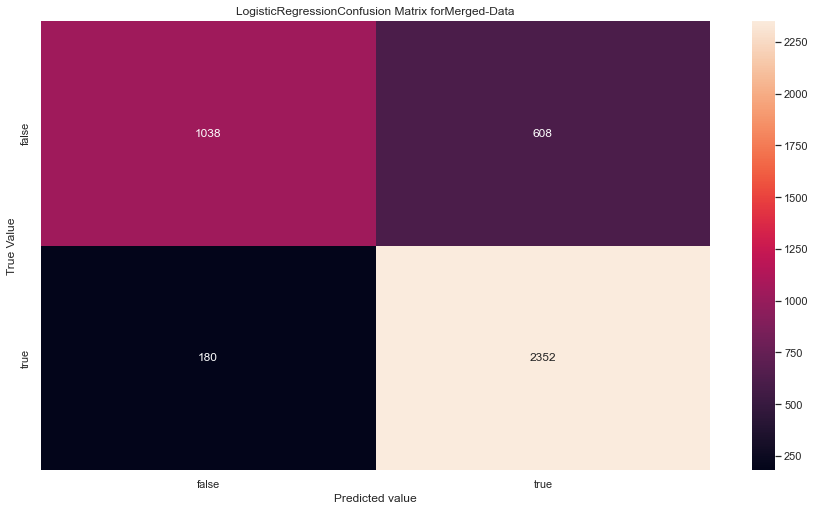

In [66]:
#Logistic Regression
Model_LR,P_LR = ML_Classifiers(tv_train, tv_test, y_train,y_test, model = 'LR')

Accuracy=perforMance_score(Model_LR , y_test, ModelName='LogisticRegression', dataname = 'Merged-Data', ShowReport = True, ConfusionMatrix=True)

#### Random Forest model and Evaluating the model 

Machine Learning Model: RandomForestClassifier
********************************************************************************************************************************************************************************************************
Accuracy= 0.9392053614169459 and Recall_Score=  0.9447077409162717
Performance Report for: Random Forest on Merged-Data 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1646
           1       0.95      0.94      0.95      2532

    accuracy                           0.94      4178
   macro avg       0.94      0.94      0.94      4178
weighted avg       0.94      0.94      0.94      4178

Confusion Matrix for: Random Forest on Merged-Data 
 [[1532  114]
 [ 140 2392]]


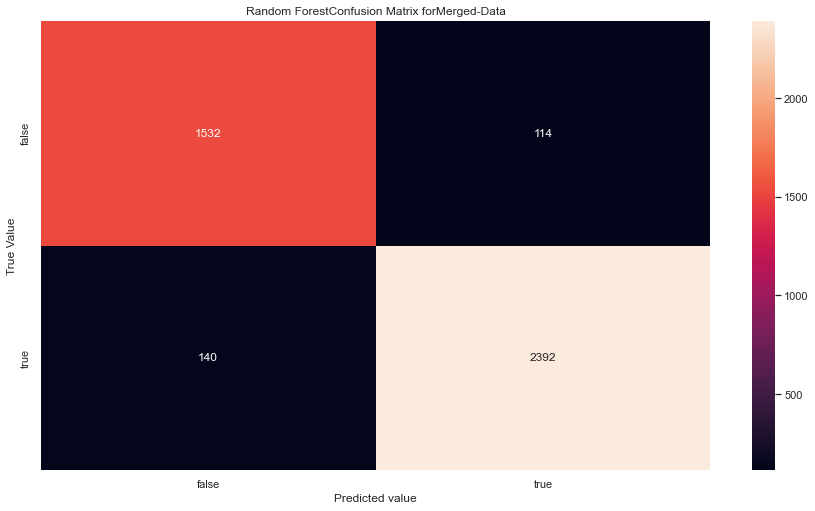

In [67]:

Model_RF,P_RF = ML_Classifiers(tv_train, tv_test, y_train,y_test, model = 'RF')

Accuracy_rf=perforMance_score(Model_RF , y_test, ModelName='Random Forest', dataname = 'Merged-Data', ShowReport = True, ConfusionMatrix=True)

#### Decission tree model and Evaluating the model 

Machine Learning Model: DecisionTreeClassifier
********************************************************************************************************************************************************************************************************
Accuracy= 0.8113930110100527 and Recall_Score=  0.9289099526066351
Performance Report for: Decission Tree on Merged-Data 
               precision    recall  f1-score   support

           0       0.85      0.63      0.72      1646
           1       0.79      0.93      0.86      2532

    accuracy                           0.81      4178
   macro avg       0.82      0.78      0.79      4178
weighted avg       0.82      0.81      0.80      4178

Confusion Matrix for: Decission Tree on Merged-Data 
 [[1038  608]
 [ 180 2352]]


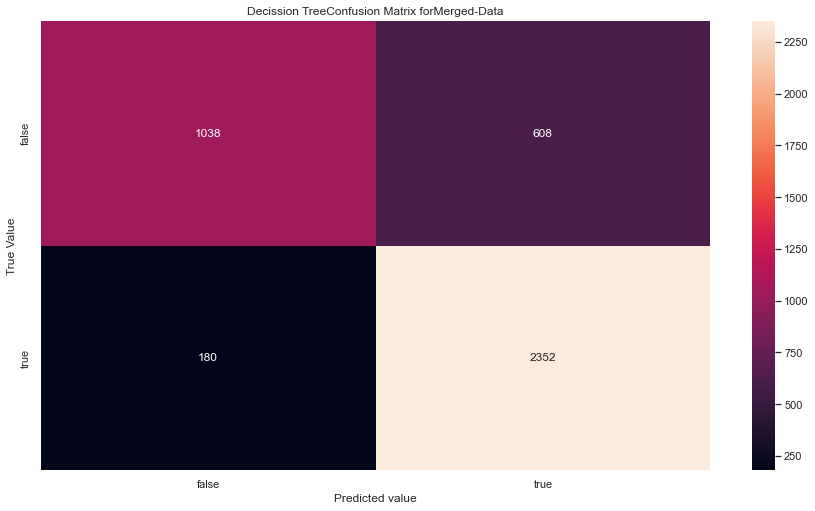

In [68]:

Model_DT,P_DT = ML_Classifiers(tv_train, tv_test, y_train,y_test, model = 'DT')

Accuracy_DT=perforMance_score(Model_LR , y_test, ModelName='Decission Tree', dataname = 'Merged-Data', ShowReport = True, ConfusionMatrix=True)

#### SVM model and Evaluating the model 

Machine Learning Model: SVC
********************************************************************************************************************************************************************************************************
Accuracy= 0.8113930110100527 and Recall_Score=  0.9289099526066351
Performance Report for: SVM on Merged-Data 
               precision    recall  f1-score   support

           0       0.85      0.63      0.72      1646
           1       0.79      0.93      0.86      2532

    accuracy                           0.81      4178
   macro avg       0.82      0.78      0.79      4178
weighted avg       0.82      0.81      0.80      4178

Confusion Matrix for: SVM on Merged-Data 
 [[1038  608]
 [ 180 2352]]


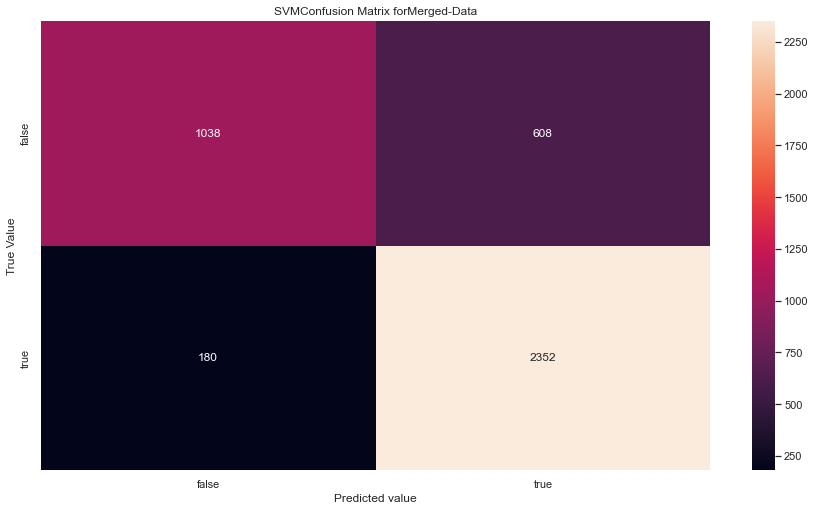

In [35]:
Model_SVM,P_SVM = ML_Classifiers(tv_train, tv_test, y_train,y_test, model = 'SVM')

Accuracy_SVM=perforMance_score(Model_LR , y_test, ModelName='SVM', dataname = 'Merged-Data', ShowReport = True, ConfusionMatrix=True)

### Machine learning classification problems are evaluated using ROC (Receiver Operating Characteristic) curves to compare various thresholds.

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_logistic_regression = roc_auc_score(y_test, P_LR)
false_positive_rate_LR, true_positive_rate_LR, _ = roc_curve(y_test, P_LR)

auc_decission_tree = roc_auc_score(y_test, P_DT)
false_positive_rate_DT, true_positive_rate_DT, _ = roc_curve(y_test, P_DT)

auc_random_forest = roc_auc_score(y_test, P_RF)
false_positive_rate_RF, true_positive_rate_RF, _ = roc_curve(y_test, P_RF)

auc_support_vector = roc_auc_score(y_test, P_SVM )
false_positive_rate_svm, true_positive_rate_svm, _ = roc_curve(y_test, P_SVM )

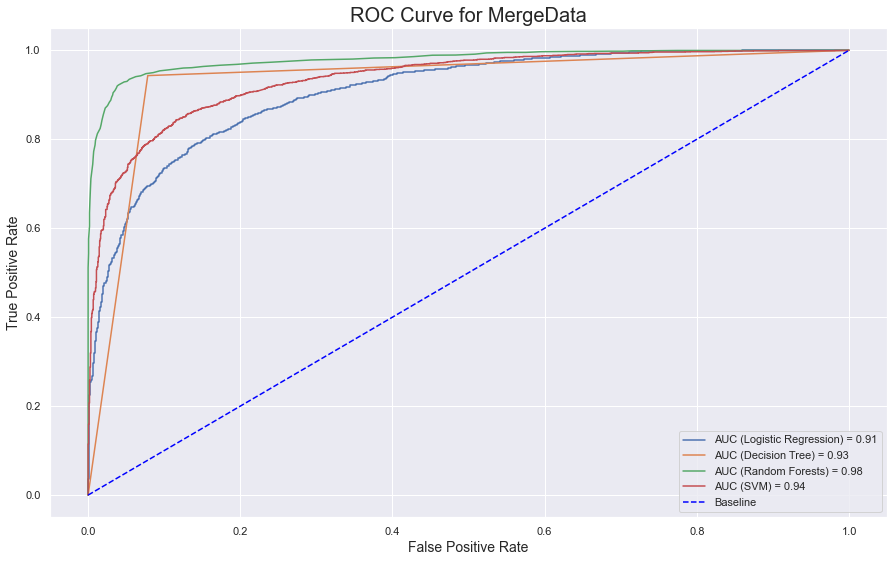

In [37]:
plt.figure(figsize=(15, 9))
plt.plot(false_positive_rate_LR, true_positive_rate_LR, label=f'AUC (Logistic Regression) = {auc_logistic_regression:.2f}')
plt.plot(false_positive_rate_DT, true_positive_rate_DT, label=f'AUC (Decision Tree) = {auc_decission_tree:.2f}')
plt.plot(false_positive_rate_RF, true_positive_rate_RF, label=f'AUC (Random Forests) = {auc_random_forest:.2f}')
plt.plot(false_positive_rate_svm, true_positive_rate_svm, label=f'AUC (SVM) = {auc_support_vector:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve for MergeData', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

In [38]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install keras_preprocessing

In [40]:

pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


#### Using LSTM Apply Neural Network

In [69]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras_preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorboard.plugins.hparams import api as hp
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#%load_ext tensorboard
from matplotlib import pyplot as plt
import datetime, os
# use GBU
os.environ["CUDA_VISIBLE_DEVICES"]="7"


Load Glove

In [70]:
def load_word_embeddings(file_path):
    emb_index = {}
    with open(file_path, encoding='utf-8') as p:
        for l in p:
            v = l.split()
            word = v[0]
            c = np.asarray(v[1:], dtype='float32')
            emb_index[word] = c
    return emb_index



In [71]:
glove_file_path = 'C:/Users/alaaa/Downloads/glove.6B.100d.txt'
print(f"Loading word embedding GloVe from {glove_file_path}...")
emb_index = load_word_embeddings(glove_file_path)
print(f'Found {len(emb_index)} word vectors.')


Loading word embedding GloVe from C:/Users/alaaa/Downloads/glove.6B.100d.txt...
Found 400001 word vectors.


In [72]:
oov_tok = "<OOV>"
# Define the maximum vocabulary size
max_vocab_size = 10000

# Define the maximum sequence length
max_sequence_length = 300

# Specify the type of embedding layer to use
# Options are 'pretrained' or 'learned'
embedding_type = 'pretrained'

# Specify the number of training epochs
num_epochs = 10

# Specify the name of the file to save the hyperparameters to
hyperparams_file = ""

# Define the possible number of LSTM units to use
possible_num_units = hp.HParam('num_units', hp.Discrete([64, 128]))

# Define the possible dropout rates to use
possible_dropout_rates =  hp.HParam('dropout', hp.Discrete([0.2, 0.3]))

# Define the possible learning rates to use
possible_learning_rates = hp.HParam('learning_rate', hp.Discrete([0.001]))

# Define the possible optimizers to use
possible_optimizers = hp.HParam('optimizer', hp.Discrete(['adam', 'rmsprop']))

# Define the possible activation functions to use
possible_activation_functions = hp.HParam('activation', hp.Discrete(['relu']))

# Specify the directory to save TensorBoard logs to
log_dir = './logs'

# Specify the directory to save hyperparameters for TensorBoard visualization
hyperparam_dir = './logs/hyperparams'


In [73]:
M_A = 'accuracy'
M_P = 'precision'
M_R = 'recall'
M_L = 'loss'

hyParams = [possible_optimizers, possible_num_units, possible_dropout_rates, possible_learning_rates] 
with tf.summary.create_file_writer(hyperparam_dir).as_default():
    hp.hparams_config(
        hparams=hyParams,
        metrics=[hp.Metric(M_A, display_name='Accuracy'),                 
                 hp.Metric(M_L, display_name='Loss'),
                 hp.Metric(M_P, display_name='Precision'),
                 hp.Metric(M_R, display_name='Recall')],
      )


In [74]:
def getting_optimizing_algorithm(algorithm,learn_R):
    optimizer_classes = {
        'rmsprop': tf.keras.optimizers.RMSprop,
        'adam': tf.keras.optimizers.Adam
    }
    if algorithm not in optimizer_classes:
        raise ValueError(f"Invalid optimization algorithm: {algorithm}")
    optimizer_class = optimizer_classes[algorithm]
    optimum_algorithm = optimizer_class(learn_R)
    return optimum_algorithm

### Implementing LSTM Model
Create some functions to implement the following steps:
1. Splitting the Data into Training and testing parts.
2. Vertorization & Word Embedding
3. Create the LSTM Model
4. Fit the Model
5. Evaluating & plot the Accuracy

In [75]:
def Convert_TextTo_sequance(X_Traindata, X_TestData):

    #print('Tokenizing: split the text into Tokens (words)')
    tokenizer = Tokenizer(num_words = max_vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(X_Traindata)

    word2idx = tokenizer.word_index
    Vocabulary_size = len(word2idx) +1
    #print ('Word_index size (vocabulary_size) is', Vocabulary_size)

    # Convert Token to sequance of word index
    #print('Convert Tokens to sequance  of word index')
    training_sequences = tokenizer.texts_to_sequences(X_Traindata)

    testing_sequences = tokenizer.texts_to_sequences(X_TestData)

    # Pad_sequence : we have to make all text of fixed length = Maxlen
    #print('Padding & truncating')
    X_train_sequance = pad_sequences(training_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

    X_test_sequance = pad_sequences(testing_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
    
    return word2idx, Vocabulary_size, X_train_sequance, X_test_sequance

In [76]:
def embedding_matrix_creation(vocabulary, word_index, embedding_dim=100):
    num_words = min(vocabulary, len(word_index) + 1)
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i >= vocabulary:
            break
        try:
            embedding_vector =  emb_index.get(word)
            embedding_matrix[i] = embedding_vector
        except KeyError:
            continue
    return embedding_matrix

In [77]:
def preprocess_text_data(data, data_name, embedding_size=100):
    # Split the data into training and testing parts
    print(f"1. {data_name} splitting into training and testing parts\n{'-'*100}")
    X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], train_size=0.8, random_state=42)
    
   
    
    word2idx, Vocabulary_size, X_train_sequance, X_test_sequance = Convert_TextTo_sequance(X_train, X_test)
    #print('create a weight matrix for words in training docs')
    embedding_matrix = embedding_matrix_creation(Vocabulary_size,word2idx,embedding_size)
    Resultlist = {'Vocabulary_size':Vocabulary_size, 'embedding_size': embedding_size }
    return Resultlist, embedding_matrix, X_train_sequance, X_test_sequance, y_train, y_test

### Buliding Machine learning model using LSTM
Build a sequential model with the following layers:

Embedding layer: This input layer converts each word in the text into a fixed-length dense vector of size embedding_dim. It requires that the input data is integer (each word represented as a unique index) The input argument equal to the vocabulary size, and the output dimension is the size of the output vectors for each word will be equal to embedding_dim we will specify. The third argument is input_length which specify the length of input sequences, weights: the embedding matrix which we create it from GloVe (PreTrained word embedding)
layer2: A bidirectional LSTM layer of number of units detected from Hyperparameter.
Dense layer1: Hidden layer of number of units with activation value detected from Hyperparameter..
Dense layer2 (output layer): contains 1 unit (0 or 1) for binary classifier and we will used sigmoid as activation function.

In [78]:
def Build_LSTMmodel(Vocabulary_size, embedding_size, embedding_matrix, hyperParams):
    
    model_lstm = tf.keras.Sequential()
    
    # Add an embedding layer
    if embedding_matrix is not None:
        # Use pre-trained embeddings
        model_lstm.add(tf.keras.layers.Embedding(input_dim=Vocabulary_size, 
                                                 output_dim=embedding_size, 
                                                 weights=[embedding_matrix], 
                                                 input_length=max_sequence_length, 
                                                 trainable=False))
    else:
        # Train embeddings from scratch
        model_lstm.add(tf.keras.layers.Embedding(input_dim=Vocabulary_size, 
                                                 output_dim=embedding_size, 
                                                 input_length=max_sequence_length, 
                                                 trainable=True))
    
    # Add an LSTM layer with dropout regularization
    model_lstm.add(tf.keras.layers.LSTM(units=embedding_size, 
                                        dropout=hyperParams[possible_dropout_rates]))
    
    # Add a dense layer with specified activation function and number of units
    model_lstm.add(tf.keras.layers.Dense(units=hyperParams[possible_num_units], 
                                      activation=hyperParams[possible_activation_functions]))
    
    # Add a dropout layer for regularization
    model_lstm.add(tf.keras.layers.Dropout(hyperParams[possible_dropout_rates]))
    
    # Add an output layer with sigmoid activation for binary classification
    model_lstm.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    opt_algo = getting_optimizing_algorithm(hyperParams[possible_optimizers], hyperParams[possible_learning_rates])
    # Compile the model 
    #model_lstm.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])    
    model_lstm.compile(optimizer=opt_algo, loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

    
    # Print the model summary
    model_lstm.summary()
    
    return model_lstm


### Training the Model & Evaluating:
Fitting: Train the model by dividing the data into "batches" of size batch_size, and repeatedly iterating over the entire set for a given number of epochs. some important argument in fitting:
Validation_data: The model will iterate over the validation dataset and compute the validation loss and validation metrics(accuracy, prcision, recall) Early Stopping in Keras Keras supports the early stopping of training via a callback called EarlyStopping.
Callbacks: is an object that can perform actions at various stages of training. We use EarlyStopping callback which will stop training when the chosen performance measure like 'loss_val' stops improving.
We use also use TensorBoard callback after every batch of training to monitor model metrics.
Evaluation: To check whether the model is the best fit for the problem statement, and to estimate the general accuracy of the model.
https://keras.io/api/callbacks/

In [79]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [80]:
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
import tensorflow as tf
import datetime, os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [81]:

def Fitting(model_lstm, x_trainDB, y_trainDB, x_testDB, y_testDB, hyperParams):
    #print('Start Fitting LSTM Model...\n', '-'*100)
    
    log_dir = "./logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    callb_list = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1),            
        tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
        tf.keras.callbacks.CSVLogger('LSTM_logs.csv', separator=",", append=False)
    ]
    
    if Embeddinglayer == 'Pre-Trained':
        batch_size = hyperParams[possible_num_units]
    else:
        batch_size = 32
       
        
    #model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_lstm.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy', 'Precision', 'Recall'])
    history = model_lstm.fit(x_trainDB, y_trainDB, batch_size=batch_size, epochs=num_epochs, 
                             validation_data=(x_testDB, y_testDB), callbacks=callb_list)
        
    return history, model_lstm


In [82]:
def plotModel(data1, data2, xlabel, ylabel, Title):
    fig, ax = plt.subplots(figsize=(8,5))
    
    ax.plot(data1)
    ax.plot(data2)
    
    ax.set_title(Title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.legend(['train', 'val'], loc='upper left')
    
    plt.show()





In [83]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

def Build_Train_Evaluate(Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test,  hparams):
    # 1-Build the Model
    model_lstm = Build_LSTMmodel(Resultlist['Vocabulary_size'], Resultlist['embedding_size'], embedding_matrix, hparams)

    # 2- Train 
    history, model_lstm = Fitting(model_lstm, X_train_sequance, y_train, X_test_sequance, y_test, hparams)
    
    # 3- Evaluate    
    print('Evaluating LSTM Model...\n', '-'*100)
    score = model_lstm.evaluate(X_test_sequance, y_test)
   
    loss = score[0]
    accuracy = score[1]
    precision = score[2]
    recall = score[3]
  
    return loss, accuracy, precision, recall, history, model_lstm
    

 

In [84]:
# this function from handson and i didi some updats
def run_LSTMModel_Hyperparameter(run_dir, hparams, Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial        
        loss, accuracy, prec, recall, history, LSTMModel = Build_Train_Evaluate(Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test, hparams)

        print('='*100)
        print('Test Accuracy:', accuracy, ' Test loss:',loss, ' Test Percision:',prec, ' Test recall:', recall )
        print('='*100)
        tf.summary.scalar(M_A, accuracy, step=1)
        tf.summary.scalar(M_L, loss, step=1)        
        tf.summary.scalar(M_P, prec, step=1)
        tf.summary.scalar(M_R, recall, step=1)
    return history, LSTMModel

In [85]:
# Take the code from hands on LSTM and make some updates
def ExecuteModel_withHyperparameter(data, dataName):
    session_num = 0
    Resultlist, embedding_matrix, X_train_sequance, X_test_sequance, y_train, y_test = preprocess_text_data(data, dataName, embedding_size=100)
    for optimizer in possible_optimizers.domain.values:
        for activation in  possible_activation_functions.domain.values:        
            for num_units in possible_num_units.domain.values:            
                for dropout_rate in possible_dropout_rates.domain.values:
                    for learning_rate in possible_learning_rates.domain.values:
                        hparams = {
                            possible_num_units: num_units,
                            possible_dropout_rates: dropout_rate,
                            possible_optimizers: optimizer,
                            possible_activation_functions: activation,
                            possible_learning_rates: learning_rate                   
                            }
                        File_name = "run-%d" % session_num
                        print('--- Starting trial: %s' % File_name)
                        print({h.name: hparams[h] for h in hparams})  
                        #run('logs/hparam_tuning/' + run_name, hparams)                       
                        #history = run_LSTMModel(Hyperparam_dir + run_name, hparams, data, dataName)
                        history, LSTMModel = run_LSTMModel_Hyperparameter(hyperparam_dir + hyperparams_file, hparams, Resultlist, embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test)
                        plotModel(history.history['loss'], history.history['val_loss'], 'epoch', 'loss','LSTM_Model_loss:'+ dataName)
                        plotModel(history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'accuracy','LSTM_Model_Accuracy: '+ dataName)
                        session_num += 1
                        

 Starting trial with epochs: 8  For Data: Mergedata
----------------------------------------------------------------------------------------------------
1. Mergedata splitting into training and testing parts
----------------------------------------------------------------------------------------------------
 Starting trial with epochs: 8  For Data: Mergedata
----------------------------------------------------------------------------------------------------
{'num_units': 128, 'dropout': 0.2, 'optimizer': 'adam', 'activation': 'relu', 'learning_rate': 0.001}
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 100)          10818200  
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)  

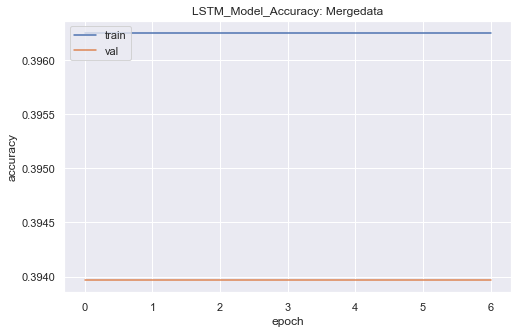

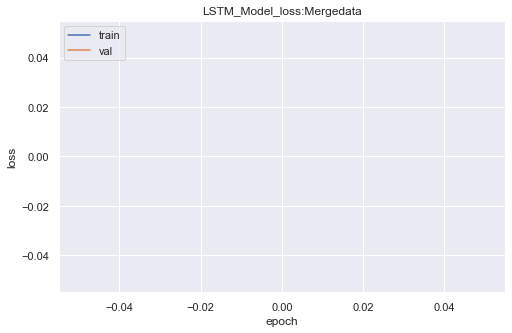

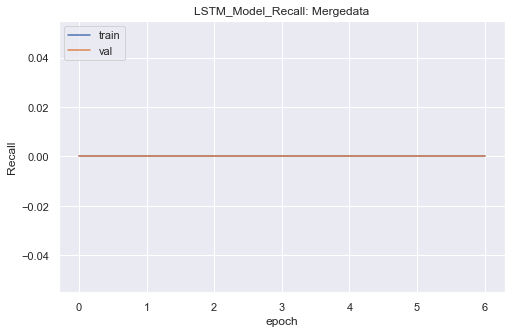

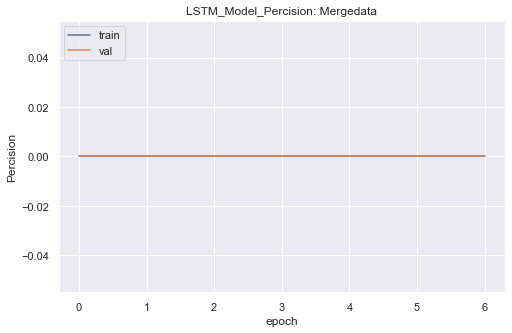

In [91]:

num_epochs = 8 # decrese the number of epoch to get the result faster
session_num = 2

dataName = 'Mergedata'
data = Merged_DF_Processed

print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
Embeddinglayer= 'Pre-Trained';  # GloVe

Resultlist, embedding_matrix, X_train_sequance, X_test_sequance, y_train, y_test = preprocess_text_data(data, dataName, embedding_size=100)


# I  tried
hparams = { possible_num_units: 128, possible_dropout_rates: 0.2, possible_optimizers: 'adam', possible_activation_functions: 'relu', possible_learning_rates: 0.001}
#hparams = { HP_NUM_UNITS: 64, HP_DROPOUT: 0.2, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
#hparams = { HP_NUM_UNITS: 128, HP_DROPOUT: 0.3, HP_OPTIMIZER: 'adam', HP_ACTIVATION: 'relu', HP_LEARNING_RATE: 0.001}
print(' Starting trial with epochs:', num_epochs, ' For Data:', dataName)
print('-'*100)
print({h.name: hparams[h] for h in hparams})     
run_name = "run-%d" % 1                  
history, LSTMModel = run_LSTMModel_Hyperparameter(hyperparam_dir + hyperparams_file, hparams,Resultlist , embedding_matrix, X_train_sequance, y_train, X_test_sequance, y_test)

#y_predict = lr.predict(X_test)
#probs_LSTMmodel = LSTMModel.predict_proba(X_test_sequance)[:, 1]
#probs_LSTMmodel = LSTMModel.predict(X_test_sequance)[:, 1]

score = LSTMModel.evaluate(X_test_sequance, y_test)
loss = score[0]
accuracy = score[1]
percision = score[2]
recall = score[3]   


plotModel(history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'accuracy','LSTM_Model_Accuracy: '+ dataName)
plotModel(history.history['loss'], history.history['val_loss'], 'epoch', 'loss','LSTM_Model_loss:'+ dataName)
plotModel(history.history['recall'], history.history['val_recall'], 'epoch', 'Recall','LSTM_Model_Recall: '+ dataName)
plotModel(history.history['precision'], history.history['val_precision'], 'epoch', 'Percision','LSTM_Model_Percision: '+ dataName)

In [87]:
LSTMModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          10818200  
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 128)               12928     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,911,657
Trainable params: 93,457
Non-trainable params: 10,818,200
_________________________________________________________________
